In [24]:
#Dependencies
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer



In [25]:
# Twitter API Keys
consumer_key = "KOda5p5lfLkLawzMYoWkno5rP"
consumer_secret = "1q6GcBLYhXcNxmDTBr48P9uvm4ECRRLu19N16aFQMQdCnks2Cc"
access_token = "922954745018544128-HOdsCXc2hk3Y3U31JlDWIHh4DqtrQkP"
access_token_secret = "Mx3ZIKXoSeEsaF2bJpiWe3JdAyqzJl0CwgD9fTQjMHwPk"


In [26]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [27]:
# Target Search Term
target_terms = ("@BBCNews", "@CBS", "@CNN",
                "@FoxNews", "@nytimes")

In [28]:
# Array to hold sentiment
sentiment_array = []

In [29]:
public_tweets = api.user_timeline(target, count=5)
public_tweets

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Sun Nov 05 15:02:07 +0000 2017',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [{'display_url': 'nyti.ms/2zclUY5',
     'expanded_url': 'http://nyti.ms/2zclUY5',
     'indices': [116, 139],
     'url': 'https://t.co/uRtlH5ygaM'}],
   'user_mentions': []},
  'favorite_count': 118,
  'favorited': False,
  'geo': None,
  'id': 927189290030915584,
  'id_str': '927189290030915584',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'en',
  'place': None,
  'possibly_sensitive': False,
  'retweet_count': 112,
  'retweeted': False,
  'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'text': 'Britain now stands as one of the world’s weakest major economies, even as the world enjoys relatively robust growth https://t.co/uRtlH5ygaM',

In [30]:
# Loop through all target users  
# Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
  # Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

#List for news organizations

news_orgs = []

#List for counter

counter_list = []

#List for tweet text

tweet_text = []
    
    
for target in target_terms:
    
    counter = 1
    
    
    # Loop through 5 pages of tweets (total 100 tweets)
  

    # Run search around each tweet
    public_tweets = api.user_timeline(target, count=100)

    # Loop through all tweets
    for tweet in public_tweets:



            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            
            #Append the tweet text
            
            tweet_text.append(tweet["text"])
            
            #Append the counter to the counter list
            counter_list.append(counter)
            
            #Append the user
            news_orgs.append(target)
            
            counter += 1
            

# Store the Average Sentiments
sentiment = {"User": news_orgs,
             "Compound": (compound_list),
             "Positive": (positive_list),
             "Neutral": (negative_list),
             "Negative": (neutral_list),
             "counter_list": (counter_list),
             "tweet_text" : (tweet_text)
            }


tweets_df = pd.DataFrame(sentiment)

In [34]:
tweets_df.head()

,Compound,Negative,Neutral,Positive,User,counter_list,tweet_text
0,0.3867,0.889,0.0,0.111,@BBCNews,1,RT @BBCSport: GOAL! Man City 1-0 Arsenal\n\nPe...
1,0.0000,1.000,0.0,0.000,@BBCNews,2,RT @BBCSport: We're off.\n\nWhat are your pred...
2,0.0000,1.000,0.0,0.000,@BBCNews,3,RT @BBCSport: Nine games ✅\nGoals as they happ...
3,0.2023,0.816,0.0,0.184,@BBCNews,4,RT @BBCSport: An important three points for To...
4,0.4019,0.886,0.0,0.114,@BBCNews,5,RT @BBCSport: David Moyes is interested in bec...


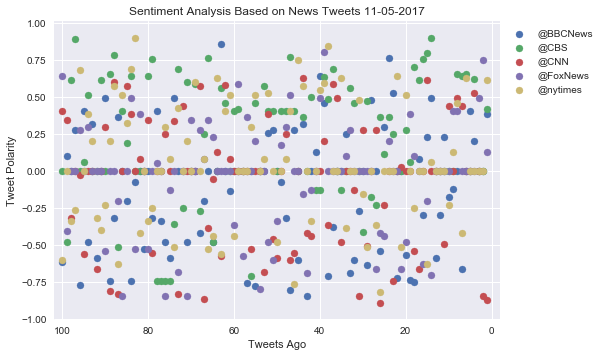

In [80]:
#bbc_df = tweets_df[tweets_df["User"] == '@BBCNews']
plt.xlim(102, -2)
for target in target_terms:
    df = tweets_df[tweets_df["User"] == target]
    xvals = df['counter_list']
    yvals = df['Compound']
    plt.scatter(xvals,yvals, label = target)
plt.legend(bbox_to_anchor=(1,1))
plt.title('Sentiment Analysis Based on News Tweets 11-05-2017')
plt.ylabel('Tweet Polarity')
plt.xlabel('Tweets Ago')
plt.savefig('twitter_scatter_analysis.png')
plt.show()

In [43]:
# Store the Average Sentiments
average_sentiments = tweets_df.groupby("User")['Compound'].mean()
average_sentiments


User
@BBCNews   -0.110391
@CBS        0.203394
@CNN       -0.072851
@FoxNews   -0.037838
@nytimes    0.048983
Name: Compound, dtype: float64

In [44]:
average_sentiments.index #ticklabels

Index(['@BBCNews', '@CBS', '@CNN', '@FoxNews', '@nytimes'], dtype='object', name='User')

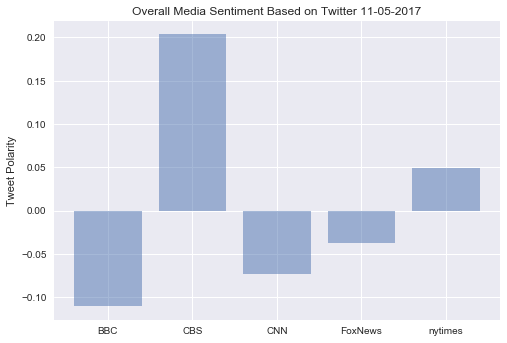

In [81]:

objects = ('BBC', 'CBS', 'CNN', 'FoxNews', 'nytimes')
y_pos = np.arange(len(objects))


plt.bar( y_pos , average_sentiments, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Tweet Polarity')
plt.title('Overall Media Sentiment Based on Twitter 11-05-2017')
plt.savefig('twitter_sentiment_bar.png')
plt.show()

In [76]:
tweets_df.to_csv('tweet_sentiments')